<a href="https://colab.research.google.com/github/DebjitHore/APL405/blob/main/SPA_forward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import io

In [6]:
# input dimensions and inital parameters
in_dim = 8
do = 0.5
out_dim = 1
tolerance = 1e-8
start = np.random.randn(in_dim)

In [7]:
# original model
model = Sequential([
    tf.keras.layers.Dense(37, activation = 'relu', input_shape = (8,)),
    tf.keras.layers.Dense(29, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss=tf.keras.losses.mse,
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["mae"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 37)                333       
                                                                 
 dense_4 (Dense)             (None, 29)                1102      
                                                                 
 dense_5 (Dense)             (None, 1)                 30        
                                                                 
Total params: 1,465
Trainable params: 1,465
Non-trainable params: 0
_________________________________________________________________


In [8]:
# training data
path1 = '/content/train_data.csv'
data1 = pd.read_csv(path1)
data1 = data1.sample(frac =1)
d = data1.to_numpy()
y = d[:,0]
y=y/(np.max(y))
x = d[:,1:9]



In [9]:
for i in range(0, 8):
  x[:,i]= x[:,i]/(np.max(x[:,i]))


In [12]:
# testing data
path2 = '/content/test_data.csv'
data2 = pd.read_csv(path2)
data2 = data2.sample(frac =1)
d1 = data2.to_numpy()
y1 = d1[:,0]
y1=y1/(np.max(y1))
x1 = d1[:,1:9]

In [13]:
for i in range(0, 8):
  x1[:,i]= x1[:,i]/(np.max(x1[:,i]))


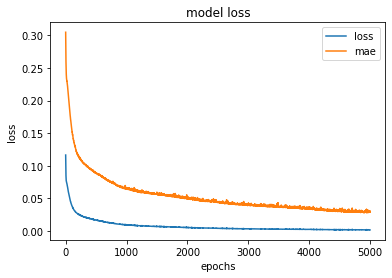

In [14]:


# original model
history = model.fit(x, y, epochs = 5000, verbose =0)

# sigmoid, sigmoid, relu
pd.DataFrame(history.history).plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [15]:
model.evaluate(x1, y1)

1/1 [==============================] - 0s 439ms/step - loss: 0.2255 - mae: 0.3920


[0.22545655071735382, 0.3919556438922882]